**Submission Dicoding Proyek Pertama : Membuat Model NLP dengan TensorFlow**

Nama : Didik Kurniawan

Username Dicoding : didik_kurniawan_slVA

Email : didik2584@gmail.com

In [1]:
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving covid19_tweet160621.csv to covid19_tweet160621.csv


In [7]:
df_tweet = pd.read_csv('/content/covid19_tweet160621.csv')
df_tweet = df_tweet[['sentiment', 'Content']]
df_tweet

,sentiment,Content
0,-18.181818,Myanmar people are suffering Covid-19 virus an...
1,0.000000,@BMarchetich @oriwa_ @androidmunk The reality ...
2,-18.181818,Myanmar people are suffering Covid-19 virus an...
3,-6.250000,"COVID-19: 600,000 American lives have now been..."
4,-18.181818,Myanmar people are suffering Covid-19 virus an...
...,...,...
6495,0.000000,ICYMI: Here are Tuesday's COVID-19 numbers for...
6496,8.695652,Get the vaccine to safely make memories with t...
6497,-3.225806,Shasta County #COVID19 update for Tuesday: Ano...
6498,4.545455,The HB 271 bill helps local governments gain m...


In [8]:
def f(row):
  if row['sentiment'] > 0:
    val = 'positive'
  elif row['sentiment'] < 0:
    val = 'negative'
  else:
    val = 'neutral'
  return val

df_tweet['sentimen'] = df_tweet.apply(f, axis=1)

<Axes: >

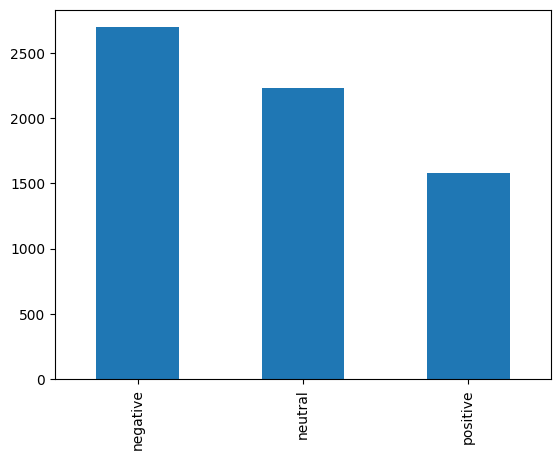

In [9]:
pd.value_counts(df_tweet['sentimen']).plot.bar()

In [10]:
df_tweet = df_tweet.drop(columns=['sentiment'])

In [11]:
category  = pd.get_dummies(df_tweet['sentimen'])

In [12]:
new_df = pd.concat([df_tweet, category], axis=1)
new_df = new_df.drop(columns=['sentimen'])
new_df

,Content,negative,neutral,positive
0,Myanmar people are suffering Covid-19 virus an...,1,0,0
1,@BMarchetich @oriwa_ @androidmunk The reality ...,0,1,0
2,Myanmar people are suffering Covid-19 virus an...,1,0,0
3,"COVID-19: 600,000 American lives have now been...",1,0,0
4,Myanmar people are suffering Covid-19 virus an...,1,0,0
...,...,...,...,...
6495,ICYMI: Here are Tuesday's COVID-19 numbers for...,0,1,0
6496,Get the vaccine to safely make memories with t...,0,0,1
6497,Shasta County #COVID19 update for Tuesday: Ano...,1,0,0
6498,The HB 271 bill helps local governments gain m...,0,0,1


In [26]:
print(new_df.shape)
new_df['Content'] = new_df['Content'].str.lower().str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+[a-zA-Z]\s+", " ").str.strip().replace('\s+', ' ', regex=True).str.strip()

new_df.drop_duplicates(keep=False, inplace=True)
print(new_df.shape)
new_df

(6302, 4)
(6300, 4)


<ipython-input-26-1b7ce8eb086f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['Content'] = new_df['Content'].str.lower().str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+[a-zA-Z]\s+", " ").str.strip().replace('\s+', ' ', regex=True).str.strip()


,Content,negative,neutral,positive
0,myanmar peopl suffer covid virus cruel min aun...,1,0,0
1,bmarchetich oriwa androidmunk realiti possibl ...,0,1,0
2,myanmar peopl suffer covid virus cruel min aun...,1,0,0
3,covid american live lost pandem https co lqsth...,1,0,0
4,myanmar peopl suffer covid virus cruel min aun...,1,0,0
...,...,...,...,...
6495,icymi tuesday covid number milton halton https...,0,1,0
6496,get vaccin safe make memori one love find covi...,0,0,1
6497,shasta counti covid updat tuesday anoth corona...,1,0,0
6498,hb bill help local govern gain control public ...,0,0,1


In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review
print(stopwords.words('english'))
new_df['Content'] = new_df['Content'].apply(stopword)
new_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,Content,negative,neutral,positive
0,myanmar peopl suffer covid virus cruel min aun...,1,0,0
1,bmarchetich oriwa androidmunk realiti possibl ...,0,1,0
2,myanmar peopl suffer covid virus cruel min aun...,1,0,0
3,covid american live lost pandem https co lqsth...,1,0,0
4,myanmar peopl suffer covid virus cruel min aun...,1,0,0
...,...,...,...,...
6495,icymi tuesday covid number milton halton https...,0,1,0
6496,get vaccin safe make memori one love find covi...,0,0,1
6497,shasta counti covid updat tuesday anoth corona...,1,0,0
6498,hb bill help local govern gain control public ...,0,0,1


In [15]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text
new_df['Content'] = new_df['Content'].apply(stemm_text)
new_df

,Content,negative,neutral,positive
0,myanmar peopl suffer covid virus cruel min aun...,1,0,0
1,bmarchetich oriwa androidmunk realiti possibl ...,0,1,0
2,myanmar peopl suffer covid virus cruel min aun...,1,0,0
3,covid american live lost pandem https co lqsth...,1,0,0
4,myanmar peopl suffer covid virus cruel min aun...,1,0,0
...,...,...,...,...
6495,icymi tuesday covid number milton halton https...,0,1,0
6496,get vaccin safe make memori one love find covi...,0,0,1
6497,shasta counti covid updat tuesday anoth corona...,1,0,0
6498,hb bill help local govern gain control public ...,0,0,1


In [16]:
sentimen = new_df['Content'].values
label = new_df[['negative', 'neutral', 'positive']].values

In [17]:
from sklearn.model_selection import train_test_split
sentimen_latih, sentimen_test, label_latih, label_test = train_test_split(sentimen, label, test_size=0.2)

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=300000, oov_token='x')
tokenizer.fit_on_texts(sentimen_latih)

sekuens_latih = tokenizer.texts_to_sequences(sentimen_latih)
sekuens_test = tokenizer.texts_to_sequences(sentimen_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

padded_latih.shape

(5041, 80)

In [19]:
a = tokenizer.word_index
jumlah_vocab = len(a)
jumlah_vocab

16495

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=jumlah_vocab+2, output_dim=16),
    tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          263952    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               148480    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [21]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)


In [23]:
history = model.fit(padded_latih, label_latih, epochs=30, validation_data=(padded_test, label_test), callbacks=[checkpoint1])

Epoch 1/30
158/158 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.5154
Epoch 1: val_accuracy improved from -inf to 0.60349, saving model to best_model1.hdf5
158/158 [==============================] - 37s 199ms/step - loss: 0.9782 - accuracy: 0.5154 - val_loss: 0.8354 - val_accuracy: 0.6035
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - ETA: 0s - loss: 0.7477 - accuracy: 0.6491
Epoch 2: val_accuracy improved from 0.60349 to 0.65504, saving model to best_model1.hdf5
158/158 [==============================] - 29s 185ms/step - loss: 0.7477 - accuracy: 0.6491 - val_loss: 0.7646 - val_accuracy: 0.6550
Epoch 3/30
158/158 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.7449
Epoch 3: val_accuracy improved from 0.65504 to 0.71293, saving model to best_model1.hdf5
158/158 [==============================] - 31s 193ms/step - loss: 0.6077 - accuracy: 0.7449 - val_loss: 0.6813 - val_accuracy: 0.7129
Epoch 4/30
158/158 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.8135
Epoch 4: val_accuracy improved from 0.71293 to 0.71610, saving model to best_model1.hdf5
158/158 [==============================] - 31s 197ms/step - loss: 0.4400 - accuracy: 0.8135 - val_loss: 0.7304 - val_accuracy: 0.7161
Epoch 5/30
158/158 [==============================] - 

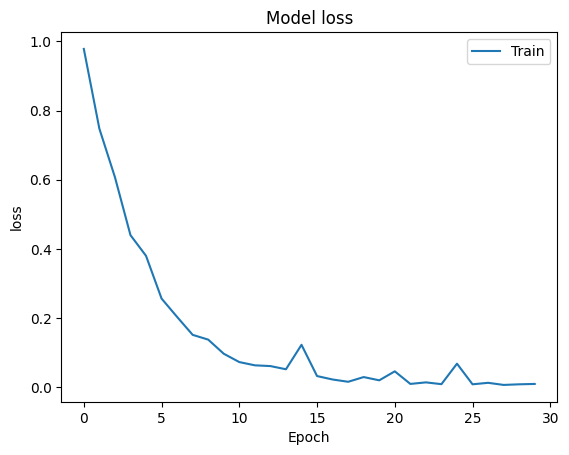

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

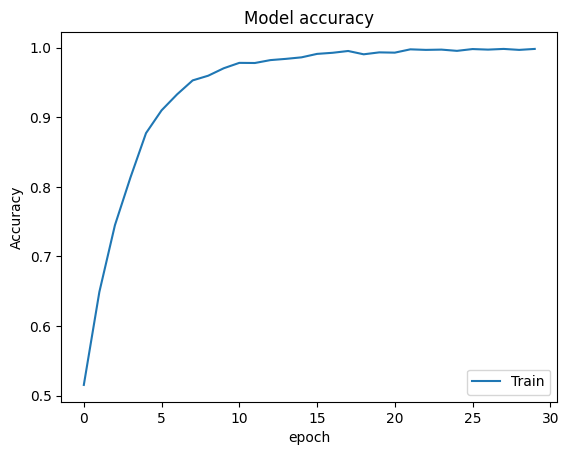

In [29]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()